In [1]:
import pandas as pd
import numpy as np
import copy

# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_woods

In [2]:
maze = gym.make('Woods1-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()

This is how maze looks like
<class 'list'>
['.', '.', '.', '.', '.', 'O', 'O', 'F']

□ □ □ □ □
□ □ □ □ □
■ ■ $ □ □
■ ■ ■ X □
■ ■ ■ □ □


In [3]:
from lcs.agents.xcs import XCS
from lcs.agents.xcs import Configuration as XCSConfig
from lcs.agents.xncs import XNCS
from lcs.agents.xncs import Configuration as XNCSConfig

from utils.xcs_utils import *
from utils.nxcs_utils import *

XCScfg = XCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xcs_metrics)

XNCScfg_no_mods = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=20,
                    update_env_input = False,
                    cover_env_input = False,)

XNCScfg_update = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=20,
                    update_env_input = True,
                    cover_env_input = False,)

XNCScfg_cover = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=20,
                    update_env_input = False,
                    cover_env_input = True,)

XNCScfg_both = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=20,
                    update_env_input = True,
                    cover_env_input = True,)

In [4]:
from utils.xcs_utils import avg_experiment as XCSExp
from utils.nxcs_utils import avg_experiment as XNCSExp

number_of_experiments = 10
explore = 0
exploit = 2500
print("Starting XCS")
df = XCSExp(maze=maze,
             cfg=XCScfg,
             number_of_tests=number_of_experiments,
             explore_trials=0,
             exploit_trials=exploit + explore,
             pre_generate=True
           )
print("Starting XNCS")
df_no_mods = XNCSExp(
    maze=maze,
    cfg=XNCScfg_no_mods,
    number_of_tests=number_of_experiments,
    explore_trials=0,
    exploit_trials=exploit + explore,
    pre_generate=True
    )
print("Starting XNCS with enviromental input during cover")
df_cover = XNCSExp(
    maze=maze,
    cfg=XNCScfg_cover,
    number_of_tests=number_of_experiments,
    explore_trials=0,
    exploit_trials=exploit + explore,
    pre_generate=True
    )
print("Starting XNCS with enviromental input during update")
df_update = XNCSExp(
    maze=maze,
    cfg=XNCScfg_update,
    number_of_tests=number_of_experiments,
    explore_trials=0,
    exploit_trials=exploit + explore,
    pre_generate=True
    )
print("Starting XNCS with all enviromental inputs")
df_both = XNCSExp(
    maze=maze,
    cfg=XNCScfg_both,
    number_of_tests=number_of_experiments,
    explore_trials=0,
    exploit_trials=exploit + explore,
    pre_generate=True

)

Starting XCS
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experiment
Executing 8 experiment
Executing 9 experiment
Starting XNCS
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experiment
Executing 8 experiment
Executing 9 experiment
Starting XNCS with enviromental input during cover
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experiment
Executing 8 experiment
Executing 9 experiment
Starting XNCS with enviromental input during update
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experim

In [12]:
df_all = pd.DataFrame(df)

df_all['steps_in_trial_no_mods']=df_no_mods['steps_in_trial']
df_all['steps_in_trial_update'] =df_update['steps_in_trial']
df_all['steps_in_trial_cover']  =df_cover['steps_in_trial']
df_all['steps_in_trial_both']   =df_both['steps_in_trial']

df_all['population_no_mods']=df_no_mods['population']
df_all['population_update'] =df_update['population']
df_all['population_cover']  =df_cover['population']
df_all['population_both']   =df_both['population']

df_all['average_specificity_no_mods']=df_no_mods['average_specificity']
df_all['average_specificity_update']=df_update['average_specificity']
df_all['average_specificity_cover']=df_cover['average_specificity']
df_all['average_specificity_both']=df_both['average_specificity']

df['fraction_accuracy_no_mods']=df_no_mods['fraction_accuracy']
df['fraction_accuracy_update']=df_update['fraction_accuracy']
df['fraction_accuracy_cover']=df_cover['fraction_accuracy']
df['fraction_accuracy_both']=df_both['fraction_accuracy']

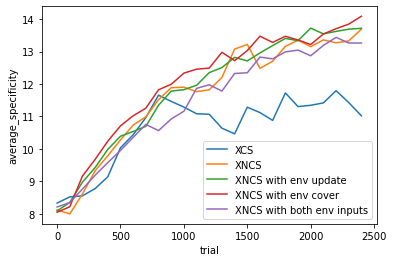

In [6]:
ax = df[['average_specificity',
         "average_specificity_no_mods",
         "average_specificity_update",
         "average_specificity_cover",
         "average_specificity_both"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["XCS","XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

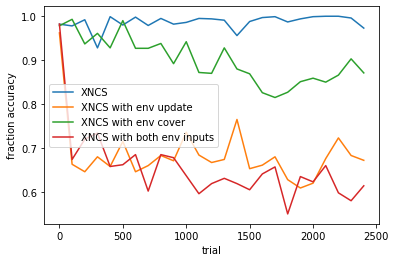

In [7]:
ax = df[["fraction_accuracy_no_mods",
         "fraction_accuracy_update",
         "fraction_accuracy_cover",
         "fraction_accuracy_both"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

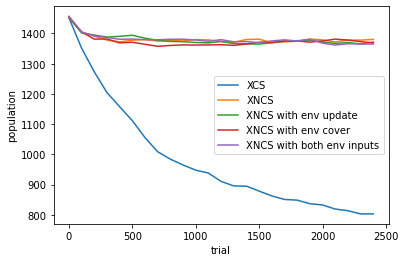

In [8]:
ax = df[['population',
         "population_no_mods",
         "population_update",
         "population_cover",
         "population_both",
        ]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["XCS","XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

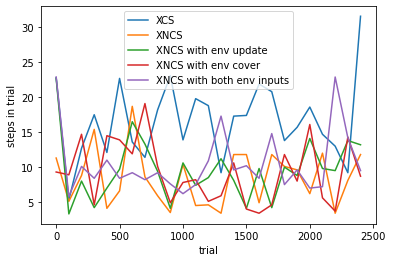

In [9]:
ax = df[['steps_in_trial',
         "steps_in_trial_no_mods",
         "steps_in_trial_update",
         "steps_in_trial_cover",
         "steps_in_trial_both",
        ]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["XCS","XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

In [10]:
print(sum(df["steps_in_trial"])/number_of_experiments)
print(sum(df["steps_in_trial_no_mods"])/number_of_experiments)
print(sum(df["steps_in_trial_update"])/number_of_experiments)
print(sum(df["steps_in_trial_cover"])/number_of_experiments)
print(sum(df["steps_in_trial_both"])/number_of_experiments)

41.510000000000005
21.240000000000002
24.130000000000003
22.97
26.360000000000003


In [11]:
display(df)
display(df_no_mods)
display(df_update)
display(df_cover)
display(df_both)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity,steps_in_trial_no_mods,steps_in_trial_update,steps_in_trial_cover,steps_in_trial_both,...,population_cover,population_both,average_specificity_no_mods,average_specificity_update,average_specificity_cover,average_specificity_both,fraction_accuracy_no_mods,fraction_accuracy_update,fraction_accuracy_cover,fraction_accuracy_both
trial,,,,,,,,,,,,,,,,,,,,,
0,22.8,900.000000,0.239477,1451.9,1600.0,8.331562,11.3,22.7,9.3,22.9,...,1454.6,1457.0,8.121375,8.089812,8.049563,8.211000,0.982011,0.962108,0.978307,0.982192
100,5.3,1305.326166,0.055605,1351.5,1600.0,8.522562,5.1,3.3,8.9,5.8,...,1405.1,1405.0,7.998000,8.352688,8.217688,8.346563,0.978000,0.663000,0.993000,0.674000
200,12.7,1115.018820,0.137544,1273.1,1600.0,8.554750,8.8,8.0,14.7,10.1,...,1381.3,1391.7,8.609687,8.975500,9.162813,8.763875,0.992000,0.646000,0.937000,0.720000
300,17.5,1057.458594,0.173717,1204.5,1600.0,8.777812,15.4,4.2,4.6,8.4,...,1381.9,1386.8,9.328750,9.425688,9.676687,9.188562,0.928000,0.680000,0.961000,0.734000
400,12.1,1275.322132,0.121168,1157.8,1600.0,9.141563,4.1,7.0,14.5,11.0,...,1368.9,1380.8,9.790938,9.985125,10.238938,9.580437,0.999000,0.658000,0.928000,0.658000
500,22.7,798.720529,0.194183,1111.7,1600.0,10.034188,6.6,9.7,13.9,8.4,...,1370.9,1381.5,10.277563,10.391500,10.709625,9.951937,0.980000,0.715000,0.990000,0.662000
600,13.6,1170.044385,0.121858,1055.6,1600.0,10.435875,18.7,16.5,11.9,9.2,...,1364.2,1379.5,10.732812,10.536188,11.020563,10.354375,0.998000,0.646000,0.927000,0.685000
700,11.4,1354.006822,0.095290,1008.8,1600.0,10.964625,8.6,13.3,19.1,8.2,...,1357.5,1379.3,10.988375,10.696500,11.253687,10.754500,0.979000,0.660000,0.927000,0.602000
800,18.2,891.602588,0.149155,984.3,1600.0,11.655063,5.9,9.4,10.1,9.2,...,1360.4,1380.9,11.515500,11.345250,11.821312,10.563375,0.995000,0.683000,0.938000,0.685000


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,11.3,1000.000000,0.132595,1600.0,1451.6,8.121375,0.982011
100,5.1,1354.244174,0.074259,1600.0,1403.9,7.998000,0.978000
200,8.8,1308.322587,0.131025,1600.0,1391.4,8.609687,0.992000
300,15.4,1072.342626,0.207170,1600.0,1378.0,9.328750,0.928000
400,4.1,1386.978090,0.055727,1600.0,1372.3,9.790938,0.999000
500,6.6,1279.428815,0.093819,1600.0,1377.7,10.277563,0.980000
600,18.7,938.450139,0.252155,1600.0,1379.8,10.732812,0.998000
700,8.6,1138.494405,0.122486,1600.0,1374.8,10.988375,0.979000
800,5.9,1315.426054,0.105081,1600.0,1377.1,11.515500,0.995000


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,22.7,700.000000,0.423672,1600.0,1452.5,8.089812,0.962108
100,3.3,1516.026282,0.058157,1600.0,1401.8,8.352688,0.663000
200,8.0,1388.998411,0.100510,1600.0,1394.8,8.975500,0.646000
300,4.2,1418.685866,0.061420,1600.0,1388.1,9.425688,0.680000
400,7.0,1295.870887,0.108251,1600.0,1390.6,9.985125,0.658000
500,9.7,1081.524255,0.138006,1600.0,1394.1,10.391500,0.715000
600,16.5,1099.456467,0.214374,1600.0,1384.4,10.536188,0.646000
700,13.3,1159.585910,0.166550,1600.0,1377.4,10.696500,0.660000
800,9.4,1272.425090,0.132936,1600.0,1373.6,11.345250,0.683000


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,9.3,1000.000000,0.119815,1600.0,1454.6,8.049563,0.978307
100,8.9,1363.134652,0.128693,1600.0,1405.1,8.217688,0.993000
200,14.7,1045.595389,0.192113,1600.0,1381.3,9.162813,0.937000
300,4.6,1513.042713,0.085147,1600.0,1381.9,9.676687,0.961000
400,14.5,1160.026692,0.199358,1600.0,1368.9,10.238938,0.928000
500,13.9,1069.643483,0.192955,1600.0,1370.9,10.709625,0.990000
600,11.9,1098.194792,0.179575,1600.0,1364.2,11.020563,0.927000
700,19.1,1001.839550,0.267465,1600.0,1357.5,11.253687,0.927000
800,10.1,1284.279925,0.159715,1600.0,1360.4,11.821312,0.938000


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,22.9,900.000000,0.429707,1600.0,1457.0,8.211000,0.982192
100,5.8,1413.230591,0.098090,1600.0,1405.0,8.346563,0.674000
200,10.1,1198.016167,0.143123,1600.0,1391.7,8.763875,0.720000
300,8.4,1317.054601,0.130797,1600.0,1386.8,9.188562,0.734000
400,11.0,1299.269812,0.163193,1600.0,1380.8,9.580437,0.658000
500,8.4,1357.636122,0.134029,1600.0,1381.5,9.951937,0.662000
600,9.2,1177.567177,0.132104,1600.0,1379.5,10.354375,0.685000
700,8.2,1414.966854,0.131656,1600.0,1379.3,10.754500,0.602000
800,9.2,1188.413672,0.135159,1600.0,1380.9,10.563375,0.685000
